

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Graffiti with Video





Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [2]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-15'] ['2016-12-14'] ['2016-12-09']
['2016-12-15']
'2016-12-15'


### get url

In [3]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/rme2-xgvs.csv?$where=opened>='2016-12-15'


In [4]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [5]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [7]:
df = pd.read_csv(url)

In [8]:
df.shape

(107, 16)

#### wow, 5 days > 1000 reports

In [9]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6633066,12/15/2016 07:28:31 PM,NaN,12/15/2016 08:08:54 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"1263 MISSION ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.776545040358, -122.414049853039)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58535f533da153f1b6e7c71c/1481079039211.jpg
1,6632969,12/15/2016 06:23:52 PM,NaN,12/15/2016 06:27:52 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 20TH ST and FLORIDA ST,9,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585350233da1531b6e7c66e/photo_20161215_182115.jpg
2,6632939,12/15/2016 06:06:45 PM,NaN,12/15/2016 07:09:11 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"2701 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.753980359532, -122.414036033345)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58534c263da153f1b6e7c625/photo_20161215_180550.jpg


In [10]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [11]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6633066,2016-12-15 19:28:31,NaT,2016-12-15 20:08:54,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"1263 MISSION ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.776545040358, -122.414049853039)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58535f533da153f1b6e7c71c/1481079039211.jpg
1,6632969,2016-12-15 18:23:52,NaT,2016-12-15 18:27:52,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 20TH ST and FLORIDA ST,9,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585350233da1531b6e7c66e/photo_20161215_182115.jpg
2,6632939,2016-12-15 18:06:45,NaT,2016-12-15 19:09:11,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"2701 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.753980359532, -122.414036033345)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58534c263da153f1b6e7c625/photo_20161215_180550.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=15.0, right=15.0
  'left=%s, right=%s') % (left, right))


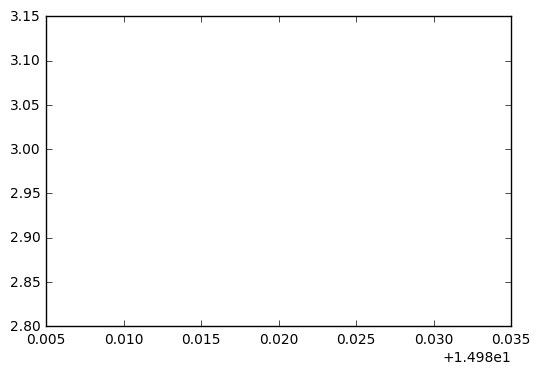

In [12]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=15.0, right=15.0
  'left=%s, right=%s') % (left, right))


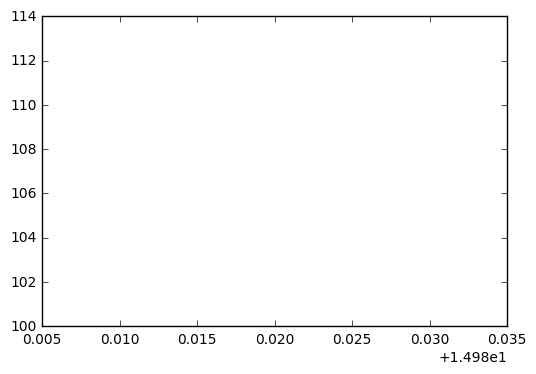

In [13]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))


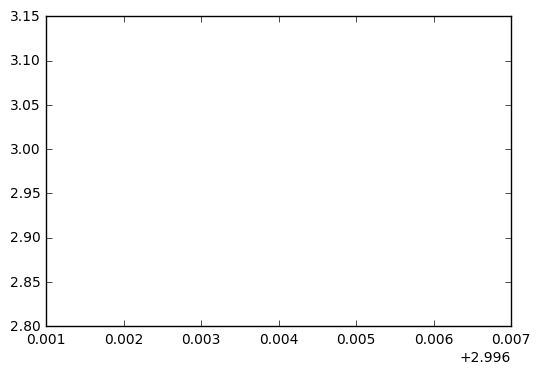

In [14]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [15]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [16]:

df['Request Details'].value_counts()


Building_commercial - Not_Offensive                 13
Signal_box - Not_Offensive                          11
Parking_meter - Not_Offensive                        9
Building_other - Not_Offensive                       9
Mail_box - Not_Offensive                             7
Transit_Shelter_Platform - Not_Offensive             7
Building_commercial - Offensive                      6
Other_enter_additional_details_below - Offensive     6
Pole - Not_Offensive                                 6
Sidewalk_in_front_of_property - Offensive            5
Mail_box - Offensive                                 4
Building_residential - Not_Offensive                 4
Sidewalk_in_front_of_property - Not_Offensive        3
Sidewalk_structure - Not_Offensive                   3
Bike_rack - Offensive                                3
City_receptacle - Not_Offensive                      2
Building_residential - Offensive                     2
Parking_meter - Offensive                            2
Building_o

In [17]:
df['Supervisor District'].value_counts().sort_index()



1      4
2      1
3     16
4      2
5      4
6     28
7      2
8      8
9     37
10     2
11     3
Name: Supervisor District, dtype: int64

In [18]:
df.Neighborhood.value_counts()

Mission               35
Tenderloin            18
Chinatown             11
South of Market        6
Inner Richmond         4
Mission Dolores        4
Civic Center           3
Duboce Triangle        3
West Portal            2
Outer Mission          2
Potrero Hill           2
Outer Sunset           2
Oceanview              1
Fisherman's Wharf      1
Financial District     1
Marina                 1
Bernal Heights         1
North Beach            1
Lower Haight           1
Nob Hill               1
Rincon Hill            1
Buena Vista            1
Alamo Square           1
Dogpatch               1
Western Addition       1
Name: Neighborhood, dtype: int64

In [19]:
df[df.Neighborhood == 'Mission']

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
1,6632969,2016-12-15 18:23:52,NaT,2016-12-15 18:27:52,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 20TH ST and FLORIDA ST,9,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585350233da1531b6e7c66e/photo_20161215_182115.jpg
2,6632939,2016-12-15 18:06:45,NaT,2016-12-15 19:09:11,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"2701 FOLSOM ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.753980359532, -122.414036033345)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58534c263da153f1b6e7c625/photo_20161215_180550.jpg
4,6632864,2016-12-15 17:30:31,NaT,2016-12-15 17:30:31,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,Intersection of 18TH ST and SAN CARLOS ST,9,Mission,"(37.7617892171553, -122.420128321734)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585343a93da153f1b6e7c5a1/report.jpg
7,6632192,2016-12-15 14:46:44,NaT,2016-12-15 16:55:40,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"3149 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.75240055061, -122.415135717521)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58531d463da153f1b6e7c27b/report.jpg
8,6632185,2016-12-15 14:45:41,NaT,2016-12-15 16:55:39,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,"3173 24TH ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.7522517601, -122.415646797574)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58531d053da153f1b6e7c26e/report.jpg
9,6632173,2016-12-15 14:42:34,NaT,2016-12-15 19:15:58,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"1308 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752124257518, -122.416579206991)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58531c4b3da153f1b6e7c25c/report.jpg
10,6632163,2016-12-15 14:39:52,NaT,2016-12-15 16:55:38,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Bike_rack - Offensive,"2807 MISSION ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752086884874, -122.418244876226)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58531ba93da153f1b6e7c24f/report.jpg
11,6632161,2016-12-15 14:39:33,NaT,2016-12-15 16:55:36,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"2807 MISSION ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752086884874, -122.418244876226)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58531b993da153f1b6e7c238/report.jpg
12,6632160,2016-12-15 14:39:17,NaT,2016-12-15 16:55:35,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Bike_rack - Offensive,"2807 MISSION ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.752086884874, -122.418244876226)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58531b893da153f1b6e7c22c/report.jpg
14,6631965,2016-12-15 13:45:09,NaT,2016-12-15 14:14:56,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,Intersection of 24TH ST and MISSION ST,9,Mission,"(37.7522394710724, -122.418445426677)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58530ed53da153f1b6e7c15d/report.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [20]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

In [21]:

peskin = df[df['Supervisor District']==3]['Media URL']
peskin = peskin.reset_index(drop=True)
print(peskin[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852f0403da153f1b6e7bde1/photo_20161215_113345.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852e3863da153f1b6e7bc65/photo_20161215_103929.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852e2923da153f1b6e7bc31/photo_20161215_103535.jpg
3                                                                                                                 NaN
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852dcf63da153f1b6e7bae4/photo_20161215_101140.jpg
5                                                                                                                 NaN
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852d9d23da153f1b6e7ba3f/photo_20161215_095951.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852d72f3da153f1b6e7b93f/photo_20161215_094816.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

In [22]:
print(peskin[:])

0     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852f0403da153f1b6e7bde1/photo_20161215_113345.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852e3863da153f1b6e7bc65/photo_20161215_103929.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852e2923da153f1b6e7bc31/photo_20161215_103535.jpg
3                                                                                                                 NaN
4     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852dcf63da153f1b6e7bae4/photo_20161215_101140.jpg
5                                                                                                                 NaN
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852d9d23da153f1b6e7ba3f/photo_20161215_095951.jpg
7     http://mobile311.sfgov.org/media/san_francisco/report/photos/5852d72f3da153f1b6e7b93f/photo_20161215_094816.jpg
8     http://mobile311.sfgov.org/media/san_francisco/rep

# The whole City

In [23]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0             http://mobile311.sfgov.org/media/san_francisco/report/photos/58535f533da153f1b6e7c71c/1481079039211.jpg
1      http://mobile311.sfgov.org/media/san_francisco/report/photos/585350233da1531b6e7c66e/photo_20161215_182115.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/58534c263da153f1b6e7c625/photo_20161215_180550.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585344863da153f1b6e7c5ab/report.jpg
4                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585343a93da153f1b6e7c5a1/report.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/58531d503da153f1b6e7c287/photo_20161215_144639.jpg
6                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58531d463da153f1b6e7c27b/report.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58531d053da153f1b6e7c26e/report.jpg
8                    http://mobile311.sfgov.org/media/sa

In [24]:
len(images)

84

In [25]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/58535f533da153f1b6e7c71c/1481079039211.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/58530d863da153f1b6e7c0ec/report.jpg


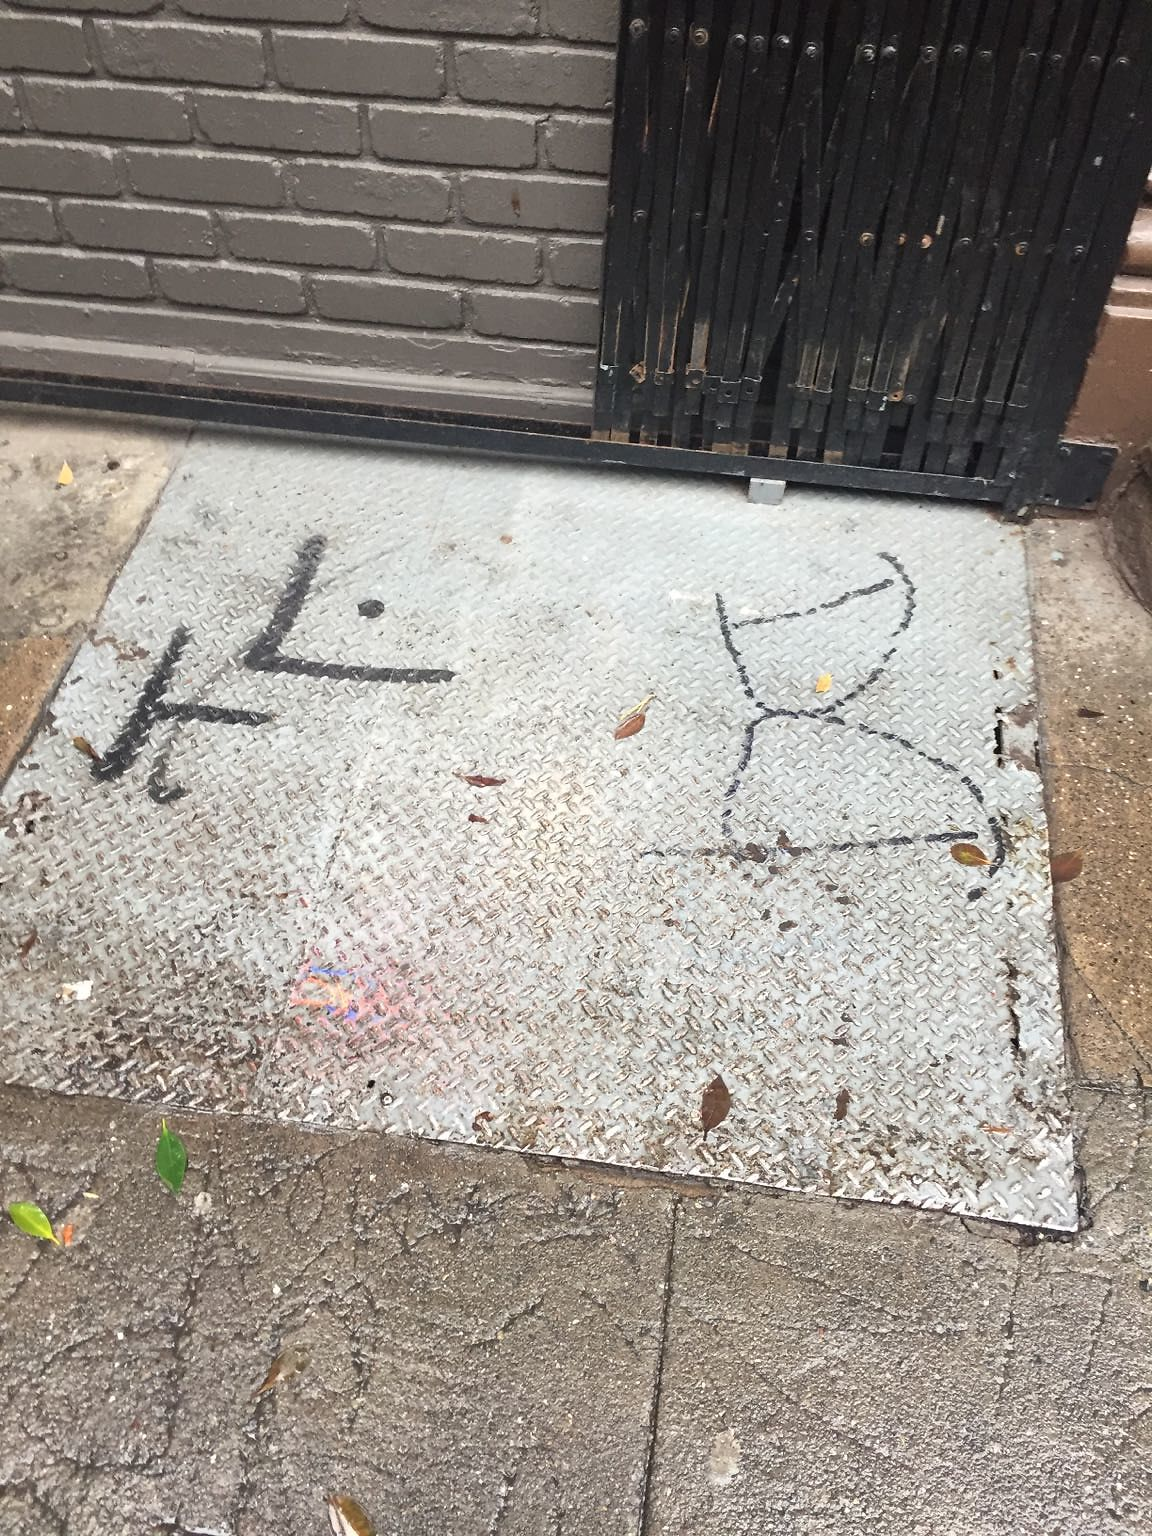

In [26]:
print(images[20])
Image(images[20])


In [27]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


In [28]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [30]:
!yes| bash vidCreate.sh 

--2016-12-16 13:41:17--  http://mobile311.sfgov.org/media/san_francisco/report/photos/58535f533da153f1b6e7c71c/1481079039211.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38362 (37K) [image/jpeg]
Saving to: '1481079039211.jpg'

1481079039211.jpg   100%[===================>]  37.46K  --.-KB/s    in 0.08s   

2016-12-16 13:41:17 (487 KB/s) - '1481079039211.jpg' saved [38362/38362]

--2016-12-16 13:41:17--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585350233da1531b6e7c66e/photo_20161215_182115.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 404 Not Found
2016-12-16 13:41:17 ERROR 404: Not Found.

--2016-12-16 13:41:17--  http://mobile311.sfgov.org/media/san_francisco/report/photos/58534c263da153f1b6e7c625/photo_20161215_180550.jpg
Reusing existing con

In [31]:
!ls -la


total 17248
drwxrwxr-x 5 gdillon gdillon     4096 Dec 16 13:43 .
drwxrwxr-x 8 gdillon gdillon     4096 Dec 15 19:05 ..
drwxrwxr-x 2 gdillon gdillon     4096 Dec 16 13:41 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon    19266 Dec 15 19:05 ImportTablefromWikipedia.ipynb
-rw-rw-r-- 1 gdillon gdillon   131626 Dec 15 19:05 SF311 Annual .ipynb
-rw-rw-r-- 1 gdillon gdillon   276804 Dec 15 19:05 San+Fran +Graffiti pull one day.ipynb
-rw-rw-r-- 1 gdillon gdillon   562269 Dec 15 19:05 San+Francisco+Graffiti with Video.ipynb
-rw-rw-r-- 1 gdillon gdillon     8983 Dec 16 13:40 imagelist.txt
drwxrwxr-x 2 gdillon gdillon     4096 Dec 16 13:41 input
drwxrwxr-x 2 gdillon gdillon     4096 Dec 15 19:05 ipynb
-rw-rw-r-- 1 gdillon gdillon      168 Dec 15 19:05 pipevid.sh
-rw-rw-r-- 1 gdillon gdillon   772883 Dec 16 13:43 sfOneDay.ipynb
-rw-rw-r-- 1 gdillon gdillon      171 Dec 15 19:05 vidCreate.sh
-rw-rw-r-- 1 gdillon gdillon 14110852 Dec 15 19:05 video.gif
-rw-rw-r-- 1 gdillon gdillon  1731215 Dec 16 1